# Space datasets description

In [1]:
import numpy as np
from spacebench import SpaceEnv, DataMaster
import matplotlib.pyplot as plt

WARNING ⚠️ : this package contains data with synthetic outcomes!
No inferences about the source data collection can be made.
By using it, you agree to understand its limitations and purpose.
The sole objective of SpaCE is to support the development of new
spatial confounding methods.



In [2]:
space_master = DataMaster()
space_master

Available datasets (total: 11):

  healthd_dmgrcs_mortality_disc
  cdcsvi_limteng_hburdic_cont
  climate_relhum_wfsmoke_cont
  climate_wfsmoke_minrty_disc
  healthd_hhinco_mortality_cont
  ...
  county_educatn_election_cont
  county_phyactiv_lifexpcy_cont
  county_dmgrcs_election_disc
  cdcsvi_nohsdp_poverty_cont
  cdcsvi_nohsdp_poverty_disc

In [3]:
space_master.master

,treatment_type,collection
environments,,
healthd_dmgrcs_mortality_disc,binary,Air Pollution and Mortality
cdcsvi_limteng_hburdic_cont,continuous,Social Vulnerability and Welfare
climate_relhum_wfsmoke_cont,continuous,Heat Exposure and Wildfires
climate_wfsmoke_minrty_disc,binary,Heat Exposure and Wildfires
healthd_hhinco_mortality_cont,continuous,Air Pollution and Mortality
healthd_pollutn_mortality_cont,continuous,Air Pollution and Mortality
county_educatn_election_cont,continuous,Welfare and Elections
county_phyactiv_lifexpcy_cont,continuous,Welfare and Elections
county_dmgrcs_election_disc,binary,Welfare and Elections


In [4]:
collections = space_master.list_collections()
collections

['Air Pollution and Mortality',
 'Social Vulnerability and Welfare',
 'Heat Exposure and Wildfires',
 'Welfare and Elections']

In [5]:
space_envs = space_master.list_envs()
space_envs

['healthd_dmgrcs_mortality_disc',
 'cdcsvi_limteng_hburdic_cont',
 'climate_relhum_wfsmoke_cont',
 'climate_wfsmoke_minrty_disc',
 'healthd_hhinco_mortality_cont',
 'healthd_pollutn_mortality_cont',
 'county_educatn_election_cont',
 'county_phyactiv_lifexpcy_cont',
 'county_dmgrcs_election_disc',
 'cdcsvi_nohsdp_poverty_cont',
 'cdcsvi_nohsdp_poverty_disc']

In [6]:
envname = space_envs[0]
env = SpaceEnv(envname)
env

SpaceEnv with birth certificate config:
{
  "spaceenv": {
    "base_name": "healthd_dmgrcs_mortality_disc",
    "data_path": "data/air_pollution_mortality.tab",
    "graph_path": "data/counties.graphml",
    "covariates": [
      "qd_mean_pm25",
      "cs_poverty",
      "cs_ed_below_highschool",
      "cs_household_income",
      "cs_median_house_value",
      "cs_other",
      "cs_population_density",
      "cdc_mean_bmi",
      "cdc_pct_cusmoker",
      "cdc_pct_sdsmoker",
      "cdc_pct_fmsmoker",
      "cdc_pct_nvsmoker",
      "cdc_pct_nnsmoker",
      "gmet_mean_tmmn",
      "gmet_mean_summer_tmmn",
      "gmet_mean_winter_tmmn",
      "gmet_mean_tmmx",
      "gmet_mean_summer_tmmx",
      "gmet_mean_winter_tmmx",
      "gmet_mean_rmn",
      "gmet_mean_summer_rmn",
      "gmet_mean_winter_rmn",
      "gmet_mean_rmx",
      "gmet_mean_summer_rmx",
      "gmet_mean_winter_rmx",
      "gmet_mean_sph",
      "gmet_mean_summer_sph",
      "gmet_mean_winter_sph",
      "bin_NORTHEAST

In [7]:
for s in space_envs:
    env = SpaceEnv(s)

## Summarize number of covariates

In [8]:
num_covars = dict()
for s in space_envs:
    env = SpaceEnv(s)
    num_covars[s] = len(env.metadata["covariates"])
num_covars

{'healthd_dmgrcs_mortality_disc': 31,
 'cdcsvi_limteng_hburdic_cont': 12,
 'climate_relhum_wfsmoke_cont': 10,
 'climate_wfsmoke_minrty_disc': 22,
 'healthd_hhinco_mortality_cont': 34,
 'healthd_pollutn_mortality_cont': 35,
 'county_educatn_election_cont': 40,
 'county_phyactiv_lifexpcy_cont': 41,
 'county_dmgrcs_election_disc': 41,
 'cdcsvi_nohsdp_poverty_cont': 10,
 'cdcsvi_nohsdp_poverty_disc': 10}

In [9]:
num_covars = dict()
for c in collections:
    environments = space_master.list_envs(collection=c)
    covars = list()
    for e in environments:
        env = SpaceEnv(e)
        covars.extend(env.metadata["covariates"])
    num_covars[c] = len(set(covars))
num_covars

{'Air Pollution and Mortality': 111,
 'Social Vulnerability and Welfare': 111,
 'Heat Exposure and Wildfires': 111,
 'Welfare and Elections': 111}

## Summarize graph nodes and edges

In [17]:
num_nodes = dict()
for s in space_envs:
    env = SpaceEnv(s, dir="downloads")
    num_nodes[s] = {
        'nodes': env.graph.number_of_nodes(), #len(list(env.graph))
        'edges': env.graph.number_of_edges() 
    }
num_nodes

{'healthd_dmgrcs_mortality_disc': {'nodes': 3109, 'edges': 9237},
 'cdcsvi_limteng_hburdic_cont': {'nodes': 6828, 'edges': 21585},
 'climate_relhum_wfsmoke_cont': {'nodes': 8616, 'edges': 26695},
 'climate_wfsmoke_minrty_disc': {'nodes': 8616, 'edges': 26695},
 'healthd_hhinco_mortality_cont': {'nodes': 3109, 'edges': 9237},
 'healthd_pollutn_mortality_cont': {'nodes': 3109, 'edges': 9237},
 'county_educatn_election_cont': {'nodes': 3108, 'edges': 9236},
 'county_phyactiv_lifexpcy_cont': {'nodes': 3107, 'edges': 9231},
 'county_dmgrcs_election_disc': {'nodes': 3108, 'edges': 9236},
 'cdcsvi_nohsdp_poverty_cont': {'nodes': 6828, 'edges': 21585},
 'cdcsvi_nohsdp_poverty_disc': {'nodes': 6828, 'edges': 21585}}

##

## Summarize feature importance

In [11]:
env.metadata["outcome_importance"]

{'EP_NOINT': '2.822646393572124',
 'EP_DISABL': '1.6235692236084387',
 'EP_AGE17': '1.4695298624718613',
 'EP_NOVEH': '1.3965648372607187',
 'EP_NOHSDP': '1.2632656819081014',
 'EP_LIMENG': '1.162969002748668',
 'EP_SNGPNT': '1.1185575962103491',
 'EP_AGE65': '0.8608152098576362',
 'EP_MINRTY': '0.8257770764441151',
 'EP_MUNIT': '0.7079269805466126',
 'EP_UNEMP': '0.53526090496491'}

In [12]:
env.metadata["treatment_importance"]

{'EP_LIMENG': '0.33568092161641155',
 'EP_NOINT': '0.1494404102906236',
 'EP_MUNIT': '0.08024022030058642',
 'EP_DISABL': '0.03896010696548912',
 'EP_MINRTY': '0.034320094226272684',
 'EP_NOVEH': '0.021280058424681877',
 'EP_AGE65': '0.016720045905107228',
 'EP_AGE17': '0.01368003755872403',
 'EP_SNGPNT': '0.00640001757133288',
 'EP_UNEMP': '0.0053600147159912175'}

In [13]:
env.metadata["confounding_score"]

{'EP_NOINT': '0.1494404102906236',
 'EP_LIMENG': '0.06958546308363311',
 'EP_MUNIT': '0.04235833169612017',
 'EP_DISABL': '0.03896010696548912',
 'EP_MINRTY': '0.034320094226272684',
 'EP_NOVEH': '0.021280058424681877',
 'EP_AGE65': '0.016720045905107228',
 'EP_AGE17': '0.01368003755872403',
 'EP_SNGPNT': '0.00640001757133288',
 'EP_UNEMP': '0.0053600147159912175'}

In [15]:
conf_score = dict()
for s in space_envs:
    env = SpaceEnv(s, dir="downloads")
    conf_score[s] = {
        'min': min(env.metadata["confounding_score"].values()), #len(list(env.graph))
        'max': max(env.metadata["confounding_score"].values())
    }
conf_score

{'healthd_dmgrcs_mortality_disc': {'min': '-0.0020631389201740446',
  'max': '0.03894166356775765'},
 'cdcsvi_limteng_hburdic_cont': {'min': '0.011070371878297649',
  'max': '0.11507197526784825'},
 'climate_relhum_wfsmoke_cont': {'min': '0.09331443630395377',
  'max': '0.3556097249352253'},
 'climate_wfsmoke_minrty_disc': {'min': '0.00653333333333328',
  'max': '0.06253333333333326'},
 'healthd_hhinco_mortality_cont': {'min': '0.0036904787008346296',
  'max': '0.04571776388187819'},
 'healthd_pollutn_mortality_cont': {'min': '0.005912432630215656',
  'max': '0.04936122992686385'},
 'county_educatn_election_cont': {'min': '0.0009286561948704933',
  'max': '0.053742471351045075'},
 'county_phyactiv_lifexpcy_cont': {'min': '0.0008399222515778157',
  'max': '0.07534169583912828'},
 'county_dmgrcs_election_disc': {'min': '-0.0006435391517509737',
  'max': '0.09485767096808603'},
 'cdcsvi_nohsdp_poverty_cont': {'min': '0.022899802891527554',
  'max': '0.12201006346348209'},
 'cdcsvi_nohsdp_

In [17]:
conf_score_list = list()
for s in space_envs:
    env = SpaceEnv(s)
    conf_score_list.extend(list(env.metadata["confounding_score"].values()))
conf_score = np.array(conf_score_list, dtype=float)

In [18]:
print(f"min: {conf_score.min()}")
print(f"q25: {np.quantile(conf_score, 0.25)}")
print(f"median: {np.median(conf_score)}")
print(f"mean: {conf_score.mean()}")
print(f"q75: {np.quantile(conf_score, 0.75)}")
print(f"max: {conf_score.max()}")

min: -0.003475111419455089
q25: 0.009098026810474715
median: 0.013891074298352644
mean: 0.024600302003953457
q75: 0.023124950722881805
max: 0.3556097249352253


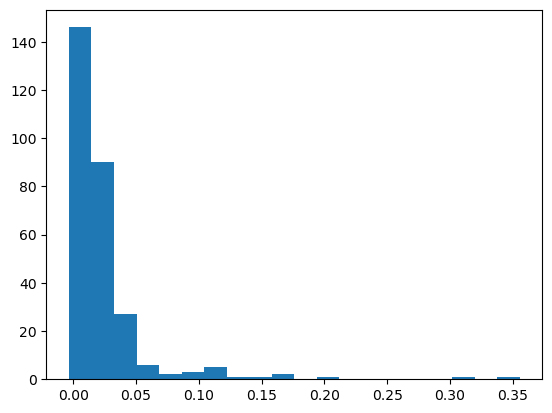

In [19]:
# make a histogram of the confounding scores
plt.hist(conf_score, bins=20);

## Summarize Spatial Smoothness

In [20]:
env.metadata["spatial_scores"]

{'EP_MINRTY': '0.7783039108312028',
 'EP_LIMENG': '0.6458485779671742',
 'EP_NOINT': '0.5434431399935832',
 'EP_MUNIT': '0.5140301190081674',
 'EP_DISABL': '0.42582719120076135',
 'EP_AGE17': '0.3747199252001685',
 'EP_AGE65': '0.37254954934640044',
 'EP_NOVEH': '0.33559351815687305',
 'EP_SNGPNT': '0.23762480186475463',
 'EP_UNEMP': '0.17238520088112147'}

In [21]:
spatial_score_list = list()
for s in space_envs:
    env = SpaceEnv(s, dir="downloads")
    spatial_score_list.extend(list(env.metadata["spatial_scores"].values()))
spatial_score = np.array(spatial_score_list)
spatial_score = spatial_score.astype(float)

In [22]:
print(f"min: {spatial_score.min()}")
print(f"q25: {np.quantile(spatial_score, 0.25)}")
print(f"median: {np.median(spatial_score)}")
print(f"mean: {spatial_score.mean()}")
print(f"q75: {np.quantile(spatial_score, 0.75)}")
print(f"max: {spatial_score.max()}")

min: 0.02737651003533779
q25: 0.3720776672219303
median: 0.6213007201984886
mean: 0.5876175933063786
q75: 0.8863877698046329
max: 0.9625116382134303


(array([ 9., 17.,  0.,  4.,  9., 22.,  6., 20.,  9., 15.,  6., 18., 17.,
        29.,  8., 10.,  7.,  0., 18., 62.]),
 array([0.02737651, 0.07413327, 0.12089002, 0.16764678, 0.21440354,
        0.26116029, 0.30791705, 0.3546738 , 0.40143056, 0.44818732,
        0.49494407, 0.54170083, 0.58845759, 0.63521434, 0.6819711 ,
        0.72872786, 0.77548461, 0.82224137, 0.86899813, 0.91575488,
        0.96251164]),
 <BarContainer object of 20 artists>)

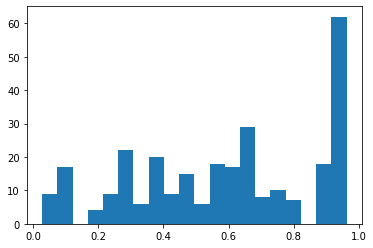

In [14]:
# make a histogram of the confounding scores
plt.hist(spatial_score, bins=20)

## Number of datasets for each level of difficulty

In [29]:
print("conf.   spatial  #")
print(f"easy    low      {np.sum((conf_score < 0.025) & (spatial_score < 0.5))}")
print(f"hard    high     {np.sum((conf_score > 0.025) & (spatial_score > 0.5))}")
print(f"easy    high     {np.sum((conf_score < 0.025) & (spatial_score > 0.5))}")
print(f"hard    low      {np.sum((conf_score > 0.025) & (spatial_score < 0.5))}")


conf.   spatial  #
easy    low      100
hard    high     56
easy    high     119
hard    low      11


In [30]:
len(conf_score)

286